# What Best Buy’s Video Game Listings Tell Us About Customer Preferences

Specifically, the group hopes to answer questions such as:

•	What are the different attributes consumers tend to account for when purchasing consoles vs. Accessories
•	Which brands provide the safest floor from poor product ratings, and which are more risky (largest variation) in terms of product rating
?
•	What specific key words do consumers look for in positive reviews and look out for in more negative-leaning revie
s?
•	Which brands excel in certain accessory types according to customer rating, sales figure and the variety of product offered?
The answer to these questions will help to provide a better assessment and understanding of what it is that consumers look for when purchasing electronic products such as video game consoles and accessories in particular from retailrs.

I
The initial dataset was web scraped using the Web scraper app.
We also used beautiful soup to scrap the category details at the later point as this was more efficient.
Below is the piece of code used for that.

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

# Load the Excel file with just the list of items extracted from the bigger dataset srapped using Web Scrapper app.
file_path = 'C:/Users/shyam/Desktop/Book1.xlsx'  
data = pd.read_excel(file_path)
data

,Item
0,Meta - Quest 2 Carrying Case - Gray
1,Thrustmaster - eSwap X Fighting Pack WW for Xb...
2,Meta - Quest 2 Fit Pack
3,Logitech - PRO Racing Wheel for PC with TRUEFO...
4,Insignia™ - Battery Pack for Meta Quest 2 & Me...
...,...
440,SteelSeries - Arctis Nova 7X Wireless Gaming H...
441,Turtle Beach - Recon 70 Wired Gaming Headset f...
442,HyperX - Cloud III Wired Gaming Headset for PC...
443,Insignia™ - Dual Controller Charging Station f...


In [2]:
# Function to fetch the most specific category from Best Buy
def get_category(item_name):
    # Step 1: Perform a search on Best Buy's website
    search_url = f'https://www.bestbuy.com/site/searchpage.jsp?st={item_name.replace(" ", "+")}'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'
    }
    search_response = requests.get(search_url, headers=headers)
    search_soup = BeautifulSoup(search_response.text, 'html.parser')
    
    # Step 2: Find the first product link on the search results page
    product_link = search_soup.find('a', {'class': 'image-link'})
    if not product_link:
        return 'Product Not Found'
    
    product_url = "https://www.bestbuy.com" + product_link['href']
    
    # Step 3: Go to the product page to retrieve category
    product_response = requests.get(product_url, headers=headers)
    product_soup = BeautifulSoup(product_response.text, 'html.parser')
    
    # Step 4: Extract the last item in the category breadcrumb
    breadcrumbs = product_soup.find_all('li', {'class': 'c-breadcrumbs-list-item'})
    if breadcrumbs:
        last_category = breadcrumbs[-1].get_text(strip=True)  # Get the text of the last breadcrumb item
        return last_category
    return 'Category Not Found'

# Create a new column for the most specific category in the DataFrame
data['Category'] = data['Item'].apply(get_category)

# Save the results back to Excel
output_file = 'categorized_items.xlsx'
data.to_excel(output_file, index=False)
print(f"Categories saved to {output_file}")

Categories saved to categorized_items.xlsx


In [3]:
# Load the above scraped dataset.
file_path2 = 'C:/Users/shyam/Data and Programming for Analytics - Fall 2024/categorized_items.xlsx'  
data2 = pd.read_excel(file_path2)
data2

,Item,Category
0,Meta - Quest 2 Carrying Case - Gray,VR Accessories
1,Thrustmaster - eSwap X Fighting Pack WW for Xb...,Gaming Controller Accessories
2,Meta - Quest 2 Fit Pack,VR Headsets
3,Logitech - PRO Racing Wheel for PC with TRUEFO...,Racing Wheels
4,Insignia™ - Battery Pack for Meta Quest 2 & Me...,VR Accessories
...,...,...
440,SteelSeries - Arctis Nova 7X Wireless Gaming H...,Gaming Headsets
441,Turtle Beach - Recon 70 Wired Gaming Headset f...,Product Not Found
442,HyperX - Cloud III Wired Gaming Headset for PC...,Product Not Found
443,Insignia™ - Dual Controller Charging Station f...,PS5 Batteries & Chargers


The above scraped deatils were then added to the main dataset and used for further analysis.

In [1]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset
data = pd.read_excel("C:/Users/shyam/Desktop/UCI/Courses/Quarter 2/BANA 212 DATA & PRGM ANLYTCS/Project/Book2.xlsx")
data

,web-scraper-order,web-scraper-start-url,name,price,Discount,%off,releasedate,review,review count,Wireless,...,top mention2,top mention(bad),Value rating,quality rating,Ease of use rating,Type,TypeCategory,Controller SubClass1,ControllerSubClass2,Specificity
0,1730688458-2,https://www.bestbuy.com/site/searchpage.jsp?st...,My Arcade - Ms Pac-Man Pocket Player Pro - Pin...,39.99,NaN,0.000000,NaN,4.2,5,NaN,...,Nostalgia (1),NaN,NaN,NaN,NaN,Console,NaN,NaN,NaN,NaN
1,1730688527-3,https://www.bestbuy.com/site/searchpage.jsp?st...,Sony - Geek Squad Certified Refurbished PlaySt...,209.99,190.0,0.475012,NaN,3.8,185,NaN,...,Price (11),Power cord (8),4.2,Video Game Cards,4.1,Console,NaN,NaN,NaN,NaN
2,1730688595-4,https://www.bestbuy.com/site/searchpage.jsp?st...,Nintendo - Geek Squad Certified Refurbished Ga...,46.99,3.0,0.060012,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Console,NaN,NaN,NaN,NaN
3,1730688658-5,https://www.bestbuy.com/site/searchpage.jsp?st...,Microsoft - Geek Squad Certified Refurbished X...,229.99,170.0,0.425011,NaN,2.0,4,NaN,...,Condition (1),Packaging (1),NaN,Video Game Cards,NaN,Console,NaN,NaN,NaN,NaN
4,1730688695-6,https://www.bestbuy.com/site/searchpage.jsp?st...,My Arcade - Tetris Go Gamer Classic Handheld P...,29.99,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Console,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,1730807435-441,https://www.bestbuy.com/site/video-games/video...,SteelSeries - Arctis Nova 7X Wireless Gaming H...,179.99,NaN,0.000000,08/23/2022,4.5,851,NaN,...,Comfort (203),Volume (7),4.4,4.6,4.6,Accessories,Gaming Headsets,NaN,NaN,Xbox
546,1730742789-4,https://www.bestbuy.com/site/video-games/video...,Logitech - PRO Racing Wheel for PC with TRUEFO...,799.99,NaN,0.000000,NaN,4.3,19,No,...,Force feedback (2),Compatibility (1),4.1,4.7,4.4,Accessories,Gaming Controllers,NaN,Racing Wheels,NaN
547,1730750130-128,https://www.bestbuy.com/site/video-games/video...,Thrustmaster - T-GT II Racing Wheel,799.99,NaN,0.000000,NaN,5.0,3,NaN,...,Looks nicer (1),NaN,NaN,NaN,NaN,Accessories,Gaming Controllers,NaN,Racing Wheels,NaN
548,1730807606-444,https://www.bestbuy.com/site/video-games/video...,Insignia™ - Dual Controller Charging Station f...,14.99,5.0,0.250125,NaN,4.7,1693,NaN,...,Easy to use (147),Compatibility (19),4.7,4.7,4.7,Accessories,Other,NaN,NaN,PlayStation


## Descriptive Statistics

In [2]:
data.describe()

,price,Discount,%off,review,USB ports,recommend rate,Value rating,Ease of use rating
count,550.000000,146.000000,550.000000,481.000000,67.000000,436.000000,322.000000,322.000000
mean,166.116673,43.102740,0.065062,4.418295,0.805970,87.208716,4.428882,4.565839
std,191.990833,55.328359,0.132825,0.598538,1.305453,16.251331,0.326319,0.287563
min,4.990000,2.000000,0.000000,1.000000,0.000000,0.000000,2.800000,3.300000
25%,39.990000,8.500000,0.000000,4.300000,0.000000,84.000000,4.300000,4.425000
50%,79.990000,20.000000,0.000000,4.500000,0.000000,91.000000,4.500000,4.600000
75%,199.990000,50.750000,0.050011,4.800000,1.000000,97.000000,4.700000,4.800000
max,999.990000,300.000000,0.640064,5.000000,4.000000,100.000000,5.000000,5.000000


In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   web-scraper-order       550 non-null    object 
 1   web-scraper-start-url   550 non-null    object 
 2   name                    550 non-null    object 
 3   price                   550 non-null    float64
 4   Discount                146 non-null    float64
 5   %off                    550 non-null    float64
 6   releasedate             198 non-null    object 
 7   review                  481 non-null    float64
 8   review count            489 non-null    object 
 9   Wireless                144 non-null    object 
 10  USB ports               67 non-null     float64
 11  Compatible Platform(s)  73 non-null     object 
 12  keyspecs                364 non-null    object 
 13  keyspecs2               292 non-null    object 
 14  Brand                   511 non-null    ob

(550, 30)

# Data Preprocessing and Cleaning 

In [4]:
# Select columns for features
brand_columns = [col for col in data.columns if col.startswith("Brand_")]
selected_features = brand_columns + ["price", "USB ports", "ESRB Rating"]

# Filter the dataset
X = data[selected_features]
y = data["review"].dropna()  # Assuming 'review' is the rating column

In [5]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values for numeric columns
X["price"] = X["price"].fillna(X["price"].median())
X["USB ports"] = X["USB ports"].fillna(X["USB ports"].median())

# Encode ESRB Rating as numerical values
if "ESRB Rating" in X.columns:
    le = LabelEncoder()
    X["ESRB Rating"] = le.fit_transform(X["ESRB Rating"].fillna("Unknown"))

C:\Users\shyam\AppData\Local\Temp\ipykernel_28312\3007401143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["price"] = X["price"].fillna(X["price"].median())
C:\Users\shyam\AppData\Local\Temp\ipykernel_28312\3007401143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["USB ports"] = X["USB ports"].fillna(X["USB ports"].median())
C:\Users\shyam\AppData\Local\Temp\ipykernel_28312\3007401143.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

# Exploratory Data Analysis - Visualizations

## Product Analysis
Product Type Distribution: 
80.4% Accessories, highlighting a market focus on supporting hardware over Consoles (19.6%).

Product Releases by Year:
 Steady growth, peaking in 2024, driven by Accessories

Top Brands by Product Count
: Nintendo leads with a mix of Accessories and Consoles, while others (e.g., Logitech, Razer) focus heavily on Accessories.


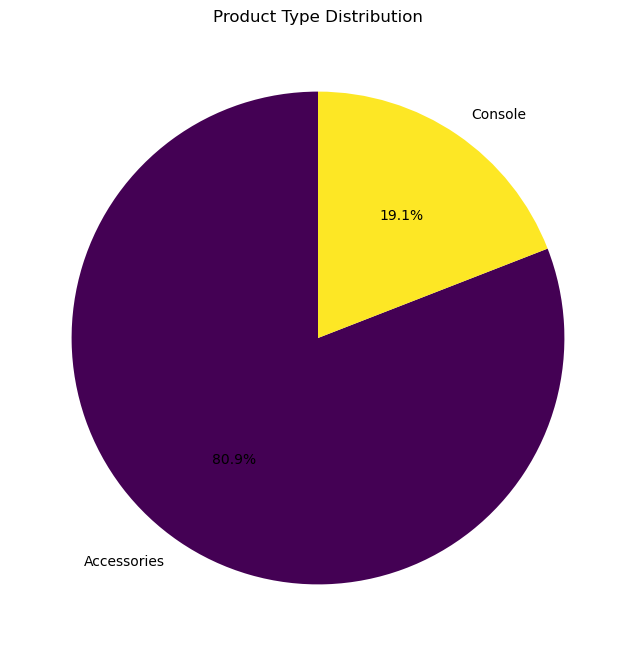

In [7]:
# Pie chart for product types
type_counts = data['Type'].value_counts()
plt.figure(figsize=(8, 8))
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Product Type Distribution')
plt.ylabel('')
plt.show()

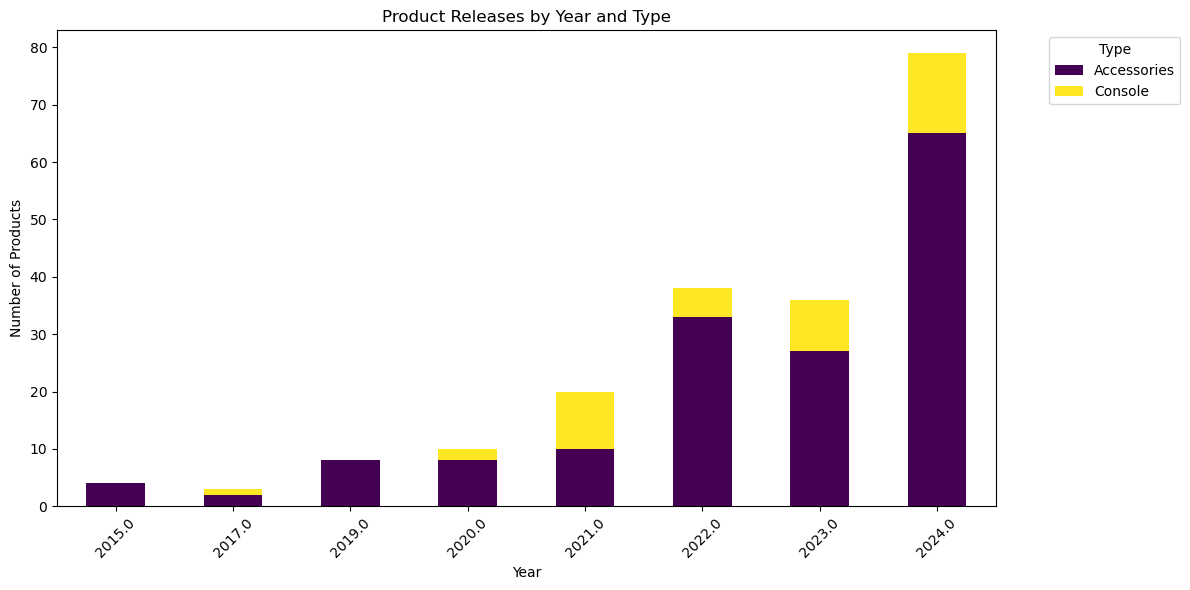

In [9]:
#Product Release by year and type
# release year is extracted
data['release_year'] = pd.to_datetime(data['releasedate'], errors='coerce').dt.year

# Group data by release year and type, then count the products
release_type_counts = data.pivot_table(index='release_year', columns='Type', aggfunc='size', fill_value=0)

# Plot stacked bar chart
release_type_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Product Releases by Year and Type')
plt.xlabel('Year')
plt.ylabel('Number of Products')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


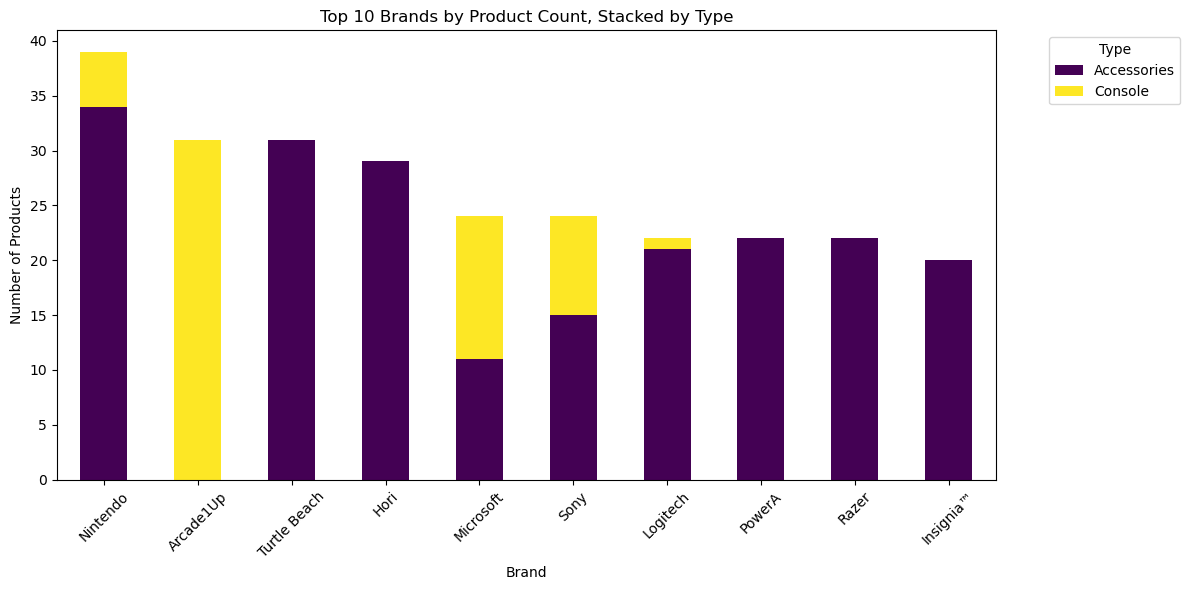

In [10]:
# Top 10 Brands by Product Count, Stacked by Type
# Group data by brand and type, then count the products
brand_type_counts = data.pivot_table(index='Brand', columns='Type', aggfunc='size', fill_value=0)

# Filter for the top 10 brands by total product count
top_brands = brand_type_counts.sum(axis=1).nlargest(10).index
top_brand_type_counts = brand_type_counts.loc[top_brands]

# Plot stacked bar chart
top_brand_type_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Top 10 Brands by Product Count, Stacked by Type')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Price and Discount Analysis

Price Distribution:
Consoles: Prices are widely spread, with peaks around $500

Accessories: Prices are concentrated below $200, reflecting affordabilit
y.
Discount Distribution:
Consoles and Accessories: Discounts are minimal, with most products showing little to no markdowns.


### Price and Discount Distribution by Type

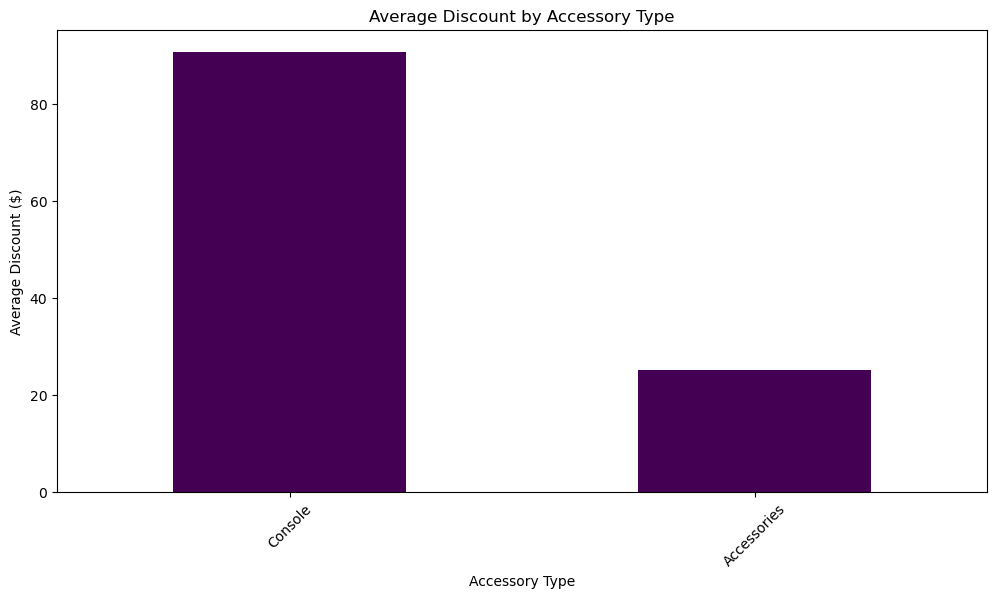

In [12]:
# Average Discount by Type
# Group by accessory type and calculate average discount
average_discount = data.groupby('Type')['Discount'].mean().sort_values(ascending=False)

# Plot average discount by accessory type
plt.figure(figsize=(12, 6))
average_discount.plot(kind='bar', colormap='viridis')
plt.title('Average Discount by Accessory Type')
plt.xlabel('Accessory Type')
plt.ylabel('Average Discount ($)')
plt.xticks(rotation=45)
plt.show()

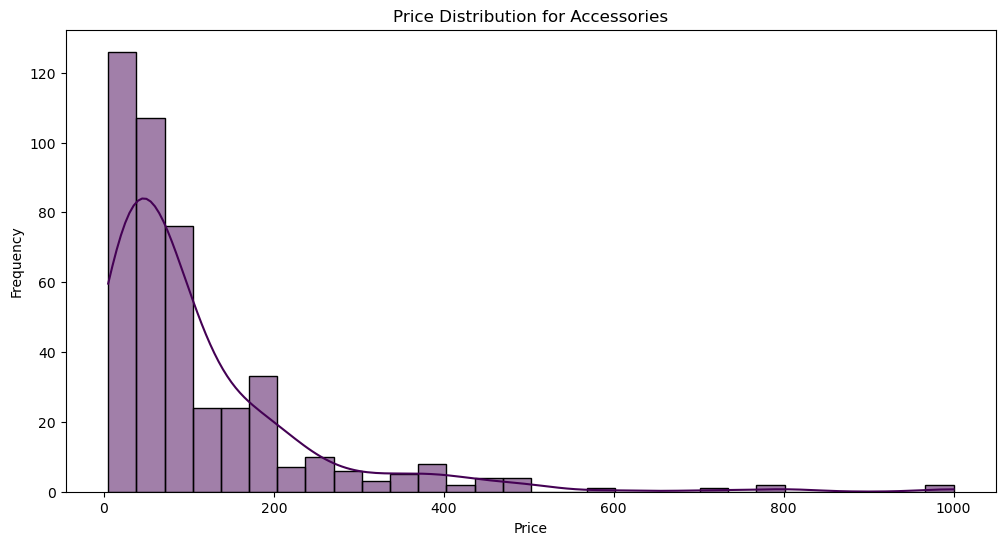

In [22]:
import matplotlib.cm as cm

# Price and Discount dsitribution for Accessories
# Filter data for Type
accessory_data = data[data['Type'] == 'Accessories'] 
console_data = data[data['Type'] != 'Accessories'] 

# Price Distribution for Accessories
plt.figure(figsize=(12, 6))
sns.histplot(accessory_data['price'], bins=30, kde=True, color=cm.viridis(0.0))
plt.title('Price Distribution for Accessories')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

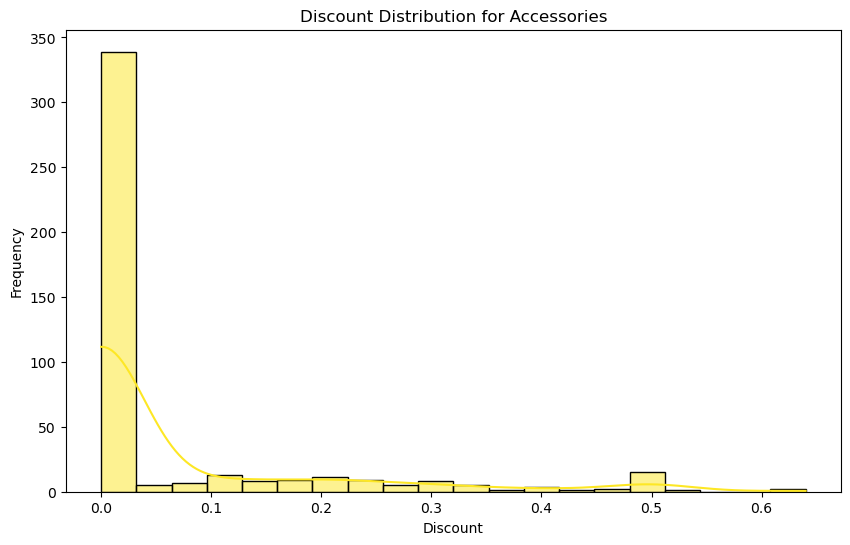

In [23]:
# Discount distribution for Accessories
plt.figure(figsize=(10, 6))
discounted_items = accessory_data[accessory_data['%off'].notnull()]
sns.histplot(discounted_items['%off'], bins=20, kde=True, color=cm.viridis(1.9))
plt.title('Discount Distribution for Accessories')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

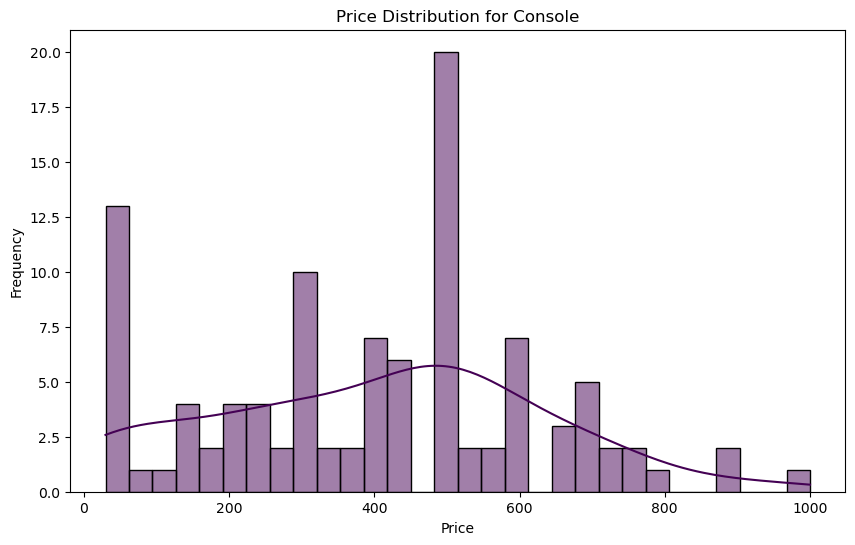

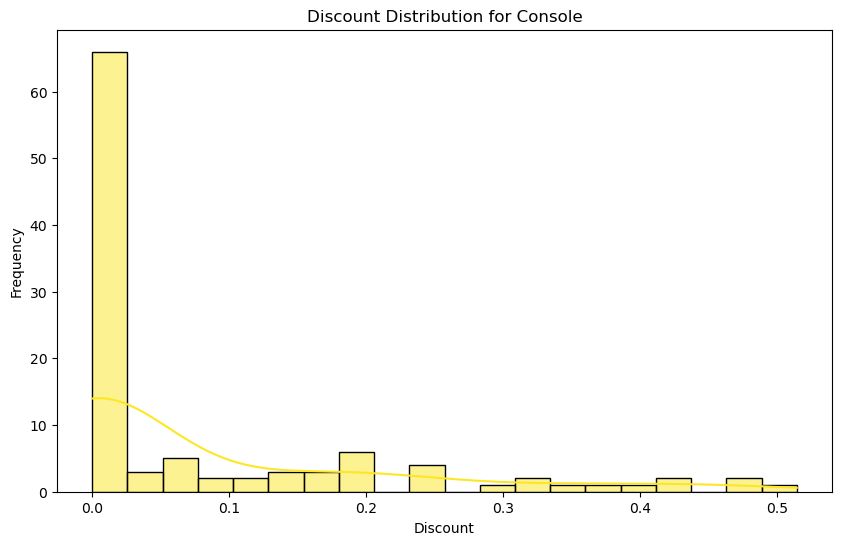

In [24]:
# Price and Discount distribution for Consoles
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(console_data['price'], bins=30, kde=True, color=cm.viridis(0.0))
plt.title('Price Distribution for Console')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Discount distribution
plt.figure(figsize=(10, 6))
discounted_items = console_data[console_data['%off'].notnull()]
sns.histplot(discounted_items['%off'], bins=20, kde=True, color=cm.viridis(1.9))
plt.title('Discount Distribution for Console')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

### Discount Pattern Analysis

In [28]:
# Convert the 'releasedate' column to datetime, handling errors gracefully
data['releasedate'] = pd.to_datetime(data['releasedate'], errors='coerce')

# Extract the year and month from the release date
data['release_year'] = data['releasedate'].dt.year
data['release_month'] = data['releasedate'].dt.month

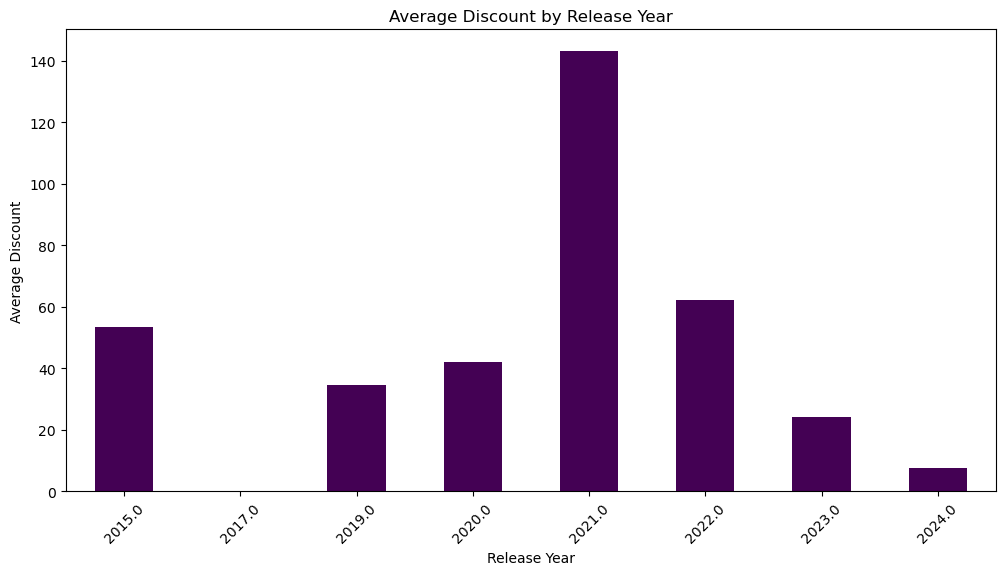

In [29]:
# Group by release year and calculate the average discount
avg_discount_by_year = data.groupby('release_year')['Discount'].mean()

# Plot: Average Discount by Release Year
plt.figure(figsize=(12, 6))
avg_discount_by_year.plot(kind='bar', colormap='viridis')
plt.title('Average Discount by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Discount')
plt.xticks(rotation=45)
plt.show()

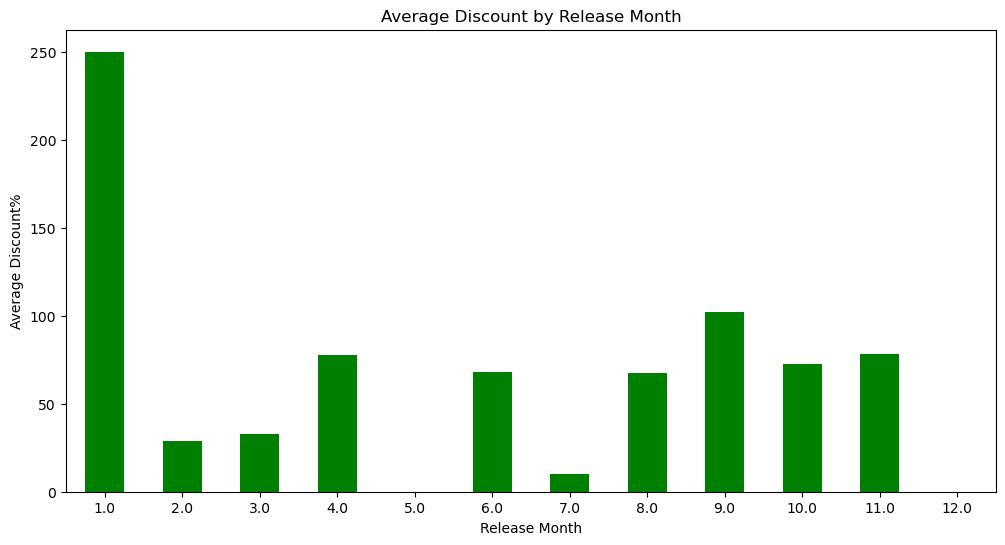

In [30]:
# Group by release month and calculate the average discount
avg_discount_by_month = data.groupby('release_month')['Discount'].mean()

# Plot: Average Discount by Release Month
plt.figure(figsize=(12, 6))
avg_discount_by_month.plot(kind='bar', color='green')
plt.title('Average Discount by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Discount%')
plt.xticks(rotation=0)
plt.show()


## Accessory Analysis

### Accessory Sub-Type Distribution

C:\Users\shyam\AppData\Local\Temp\ipykernel_28312\2807941495.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=accessories_data, x='TypeCategory', order=accessories_data['TypeCategory'].value_counts().index, palette='viridis')


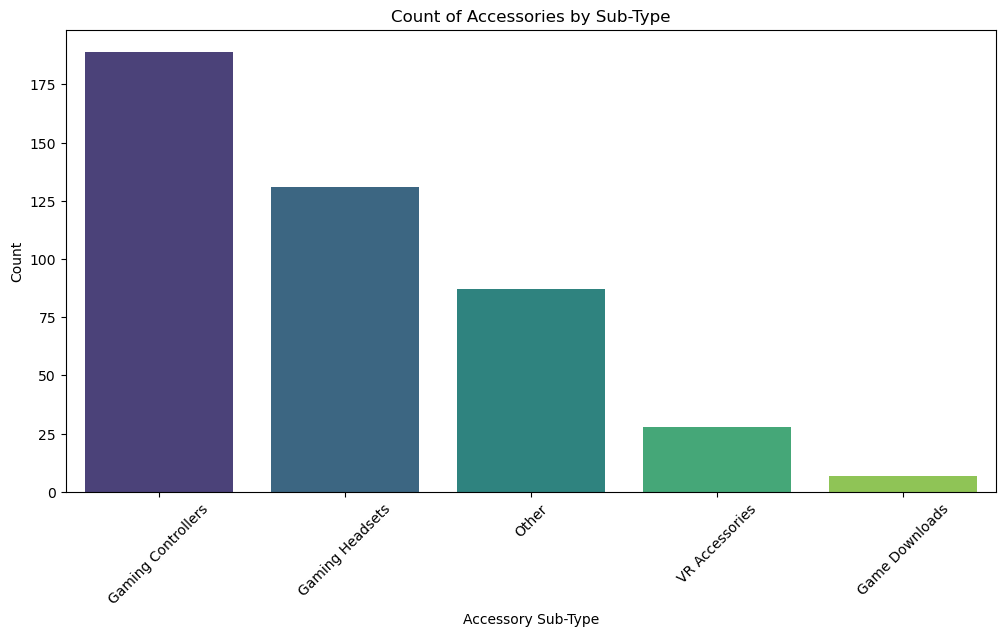

In [31]:
# Filter data for accessories only
accessories_data = data[data['Type'] == 'Accessories']

# 1. Count of Accessories by Sub-Type
plt.figure(figsize=(12, 6))
sns.countplot(data=accessories_data, x='TypeCategory', order=accessories_data['TypeCategory'].value_counts().index, palette='viridis')
plt.title('Count of Accessories by Sub-Type')
plt.xlabel('Accessory Sub-Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Price Distributions

C:\Users\shyam\AppData\Local\Temp\ipykernel_28312\2169741249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=accessories_data, x='TypeCategory', y='price', palette='viridis')


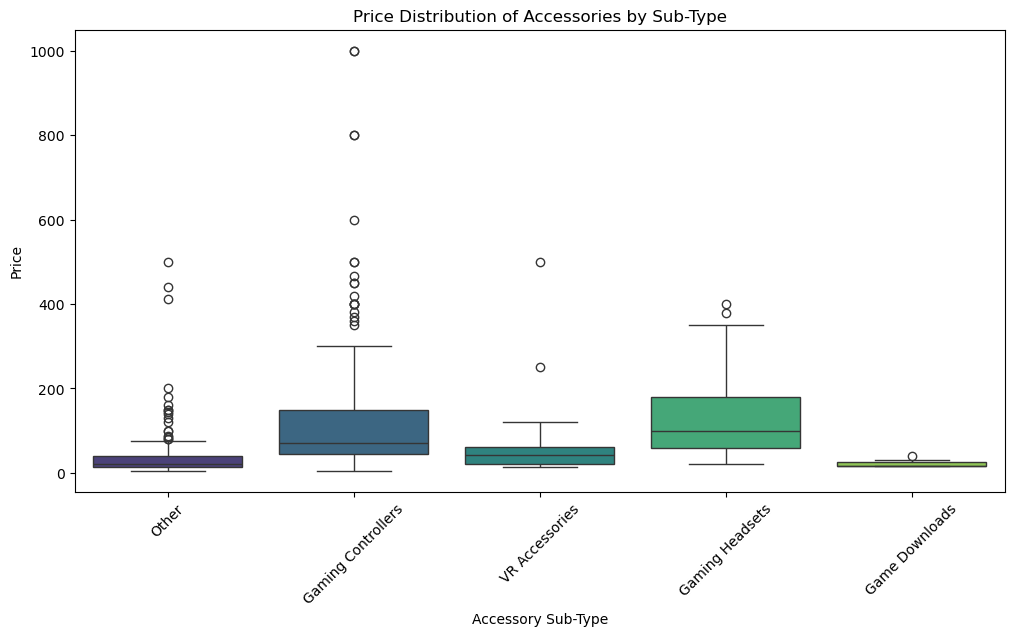

C:\Users\shyam\AppData\Local\Temp\ipykernel_28312\2169741249.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=accessories_data, x='Specificity', y='price', palette='viridis')


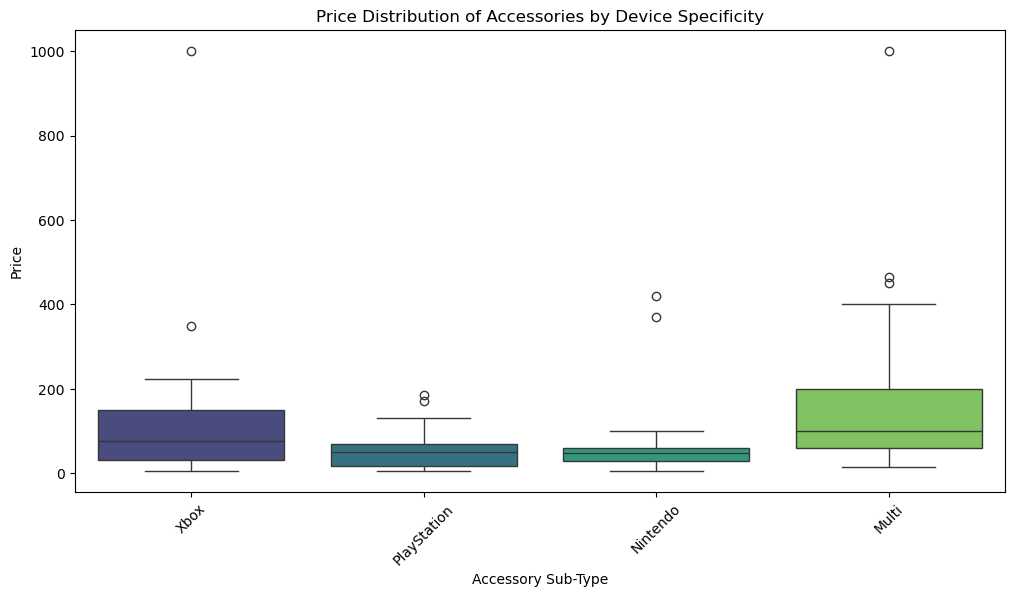

In [33]:
# 2. Price Distribution by Sub-Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=accessories_data, x='TypeCategory', y='price', palette='viridis')
plt.title('Price Distribution of Accessories by Sub-Type')
plt.xlabel('Accessory Sub-Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# 2. Price Distribution by Specificity
plt.figure(figsize=(12, 6))
sns.boxplot(data=accessories_data, x='Specificity', y='price', palette='viridis')
plt.title('Price Distribution of Accessories by Device Specificity')
plt.xlabel('Accessory Sub-Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### Top Brands

C:\Users\shyam\AppData\Local\Temp\ipykernel_28312\2238174661.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Brand', data=top_15_data, order=top_15_brands, palette='viridis')


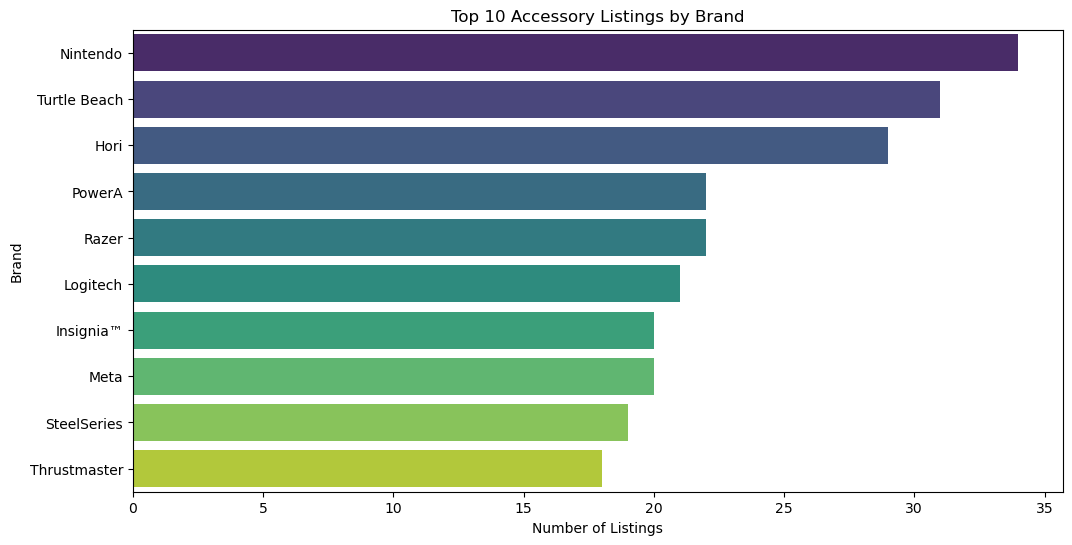

In [37]:
# Get the top 15 brands by number of listings
top_15_brands = accessories_data['Brand'].value_counts().nlargest(10).index

# Filter the data to include only the top 15 brands
top_15_data = accessories_data[accessories_data['Brand'].isin(top_15_brands)]

# Brand Popularity (Top 15 Brands)
plt.figure(figsize=(12, 6))
sns.countplot(y='Brand', data=top_15_data, order=top_15_brands, palette='viridis')
plt.title('Top 10 Accessory Listings by Brand')
plt.xlabel('Number of Listings')
plt.ylabel('Brand')
plt.show()

### Accessory Release per Year Distribution by Subtype

<Figure size 1200x800 with 0 Axes>

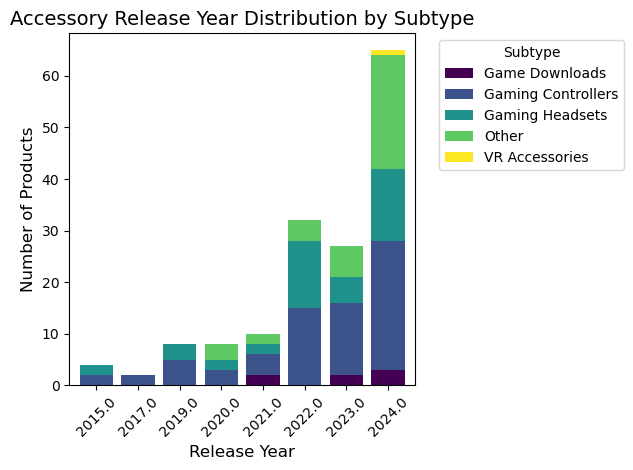

In [38]:
# Group data by release year and accessory subtype
accessory_data = data[data['Type'] == 'Accessories']  # Filter for Accessories
subtype_year_counts = accessory_data.groupby(['release_year', 'TypeCategory']).size().unstack(fill_value=0)

# Create stacked bar chart
plt.figure(figsize=(12, 8))
subtype_year_counts.plot(kind='bar', stacked=True, cmap='viridis', width=0.8)

# Add labels and title
plt.title('Accessory Release Year Distribution by Subtype', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Subtype', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Review Analysis

### Distribution of Value Ratings by Top 15 Brand

C:\Users\shyam\AppData\Local\Temp\ipykernel_28312\3066335418.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Value rating', data=top_15_data, order=top_15_brands, palette='viridis')


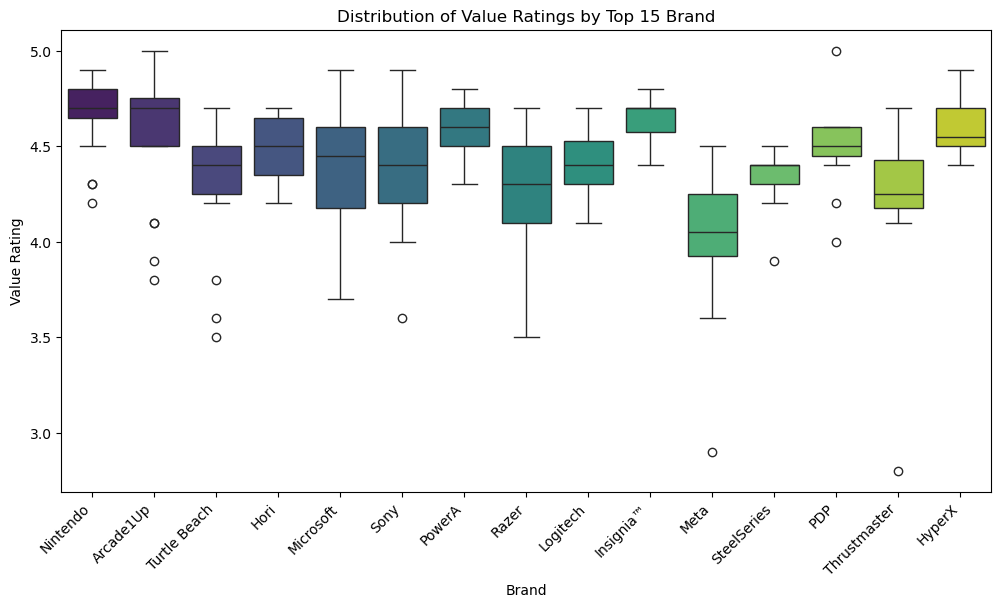

In [40]:
# Get the top 15 brands by number of listings
top_15_brands = data['Brand'].value_counts().nlargest(15).index

# Filter the data to include only the top 15 brands
top_15_data = data[data['Brand'].isin(top_15_brands)]
# Ratings Analysis (Top 10 Brands) - Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Value rating', data=top_15_data, order=top_15_brands, palette='viridis')
plt.title('Distribution of Value Ratings by Top 15 Brand')
plt.xlabel('Brand')
plt.ylabel('Value Rating')
plt.xticks(rotation=45, ha='right')  # Rotate brand names for better readability
plt.show()

### Price vs. Value Rating

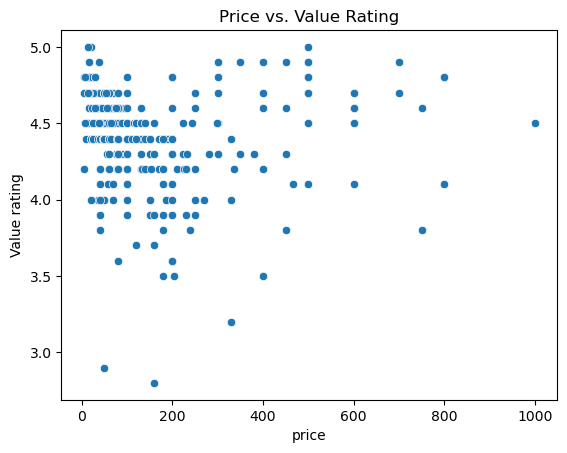

In [42]:

sns.scatterplot(x='price', y='Value rating', data=data)
plt.title('Price vs. Value Rating')
plt.show()

### Heatmap of Average Value, Ease of Use and Quality Ratings

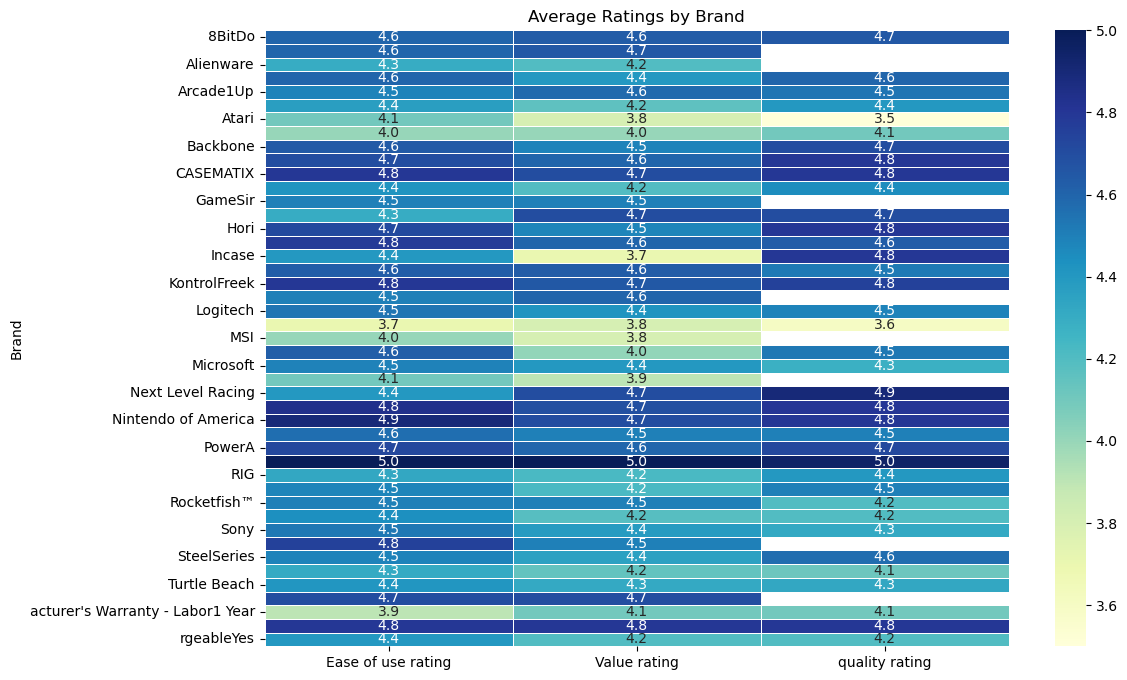

In [44]:
# Convert rating columns to numeric, coercing errors to NaN
data['Value rating'] = pd.to_numeric(data['Value rating'],
errors='coerce')
data['quality rating'] = pd.to_numeric(data['quality rating'],
errors='coerce')
data['Ease of use rating'] = pd.to_numeric(data['Ease of use rating'],
errors='coerce')
# Re-calculate the mean ratings for each Brand and Type
ratings_pivot = data.pivot_table(values=['Value rating', 'quality rating', 'Ease of use rating'],
 index='Brand',
# columns='Type',
 aggfunc='mean')
# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ratings_pivot, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Ratings by Brand')
plt.ylabel('Brand')
plt.show()

### Price vs Reviews and Ratings

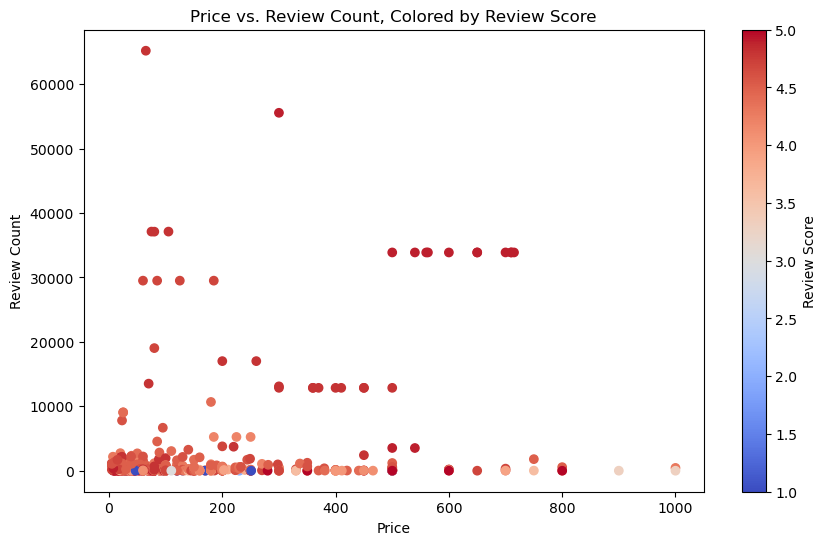

In [52]:
import matplotlib.colors as mcolors

# Convert 'review count' to numeric, forcing errors to NaN
data['review count'] = pd.to_numeric(data['review count'], errors='coerce')

# Set up the colormap for 'review' scores
norm = mcolors.Normalize(vmin=data['review'].min(), vmax=data['review'].max())
cmap = cm.coolwarm

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data['price'], 
    data['review count'], 
    c=data['review'],  # Use review scores for color mapping
    cmap=cmap, 
    norm=norm
)

# Add colorbar for review scores
cbar = plt.colorbar(scatter)
cbar.set_label('Review Score')

# Set labels and title
plt.title('Price vs. Review Count, Colored by Review Score')
plt.xlabel('Price')
plt.ylabel('Review Count')
plt.show()

### Relation between review count and affordability

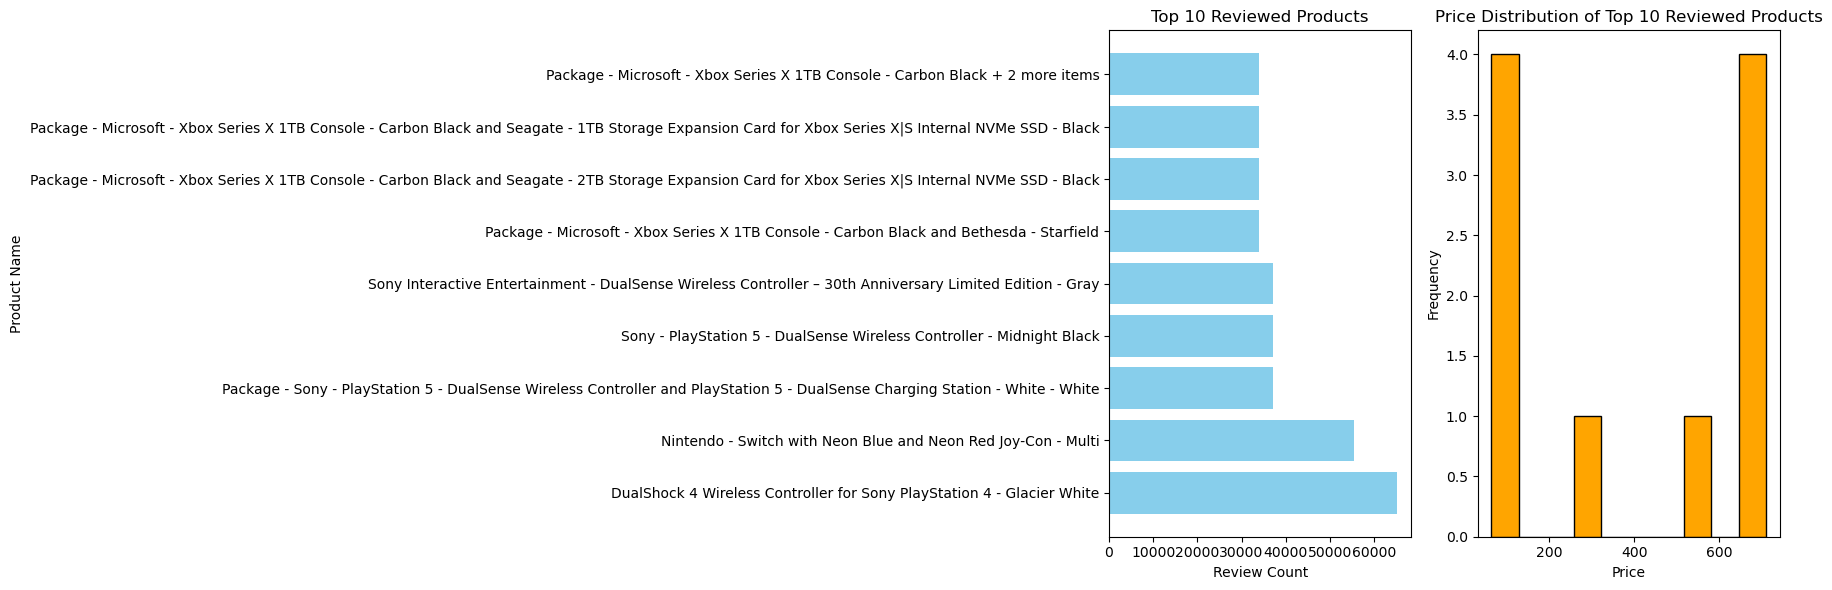

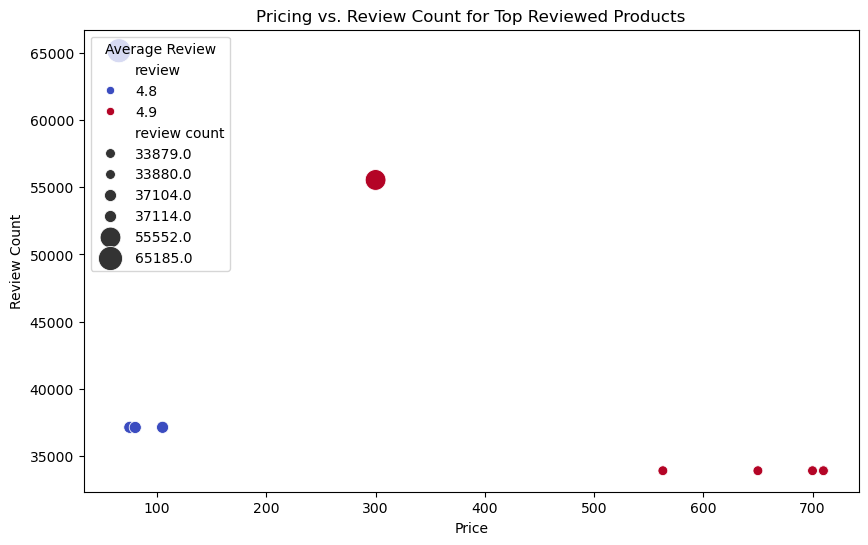

In [53]:
# Top 10 reviewed products based on review count
top_reviewed = data.nlargest(10, 'review count')[['name', 'review count', 'review', 'price']]

# Set up the plot with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Top 10 reviewed products with their prices
axes[0].barh(top_reviewed['name'], top_reviewed['review count'], color='skyblue')
axes[0].set_title('Top 10 Reviewed Products')
axes[0].set_xlabel('Review Count')
axes[0].set_ylabel('Product Name')

# Plot 2: Price Distribution for Top 10 reviewed products
axes[1].hist(top_reviewed['price'], bins=10, color='orange', edgecolor='black')
axes[1].set_title('Price Distribution of Top 10 Reviewed Products')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Additional: Pricing vs. Review Count for Top Products
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=top_reviewed['price'], 
    y=top_reviewed['review count'], 
    hue=top_reviewed['review'], 
    palette='coolwarm', 
    size=top_reviewed['review count'], 
    sizes=(50, 300)
)
plt.title('Pricing vs. Review Count for Top Reviewed Products')
plt.xlabel('Price')
plt.ylabel('Review Count')
plt.legend(title='Average Review', loc='upper left')
plt.show()


## Top Mentions Analysis

In [78]:
# Strip everything after '('
data['top mentions1'] = data['top mentions1'].str.split('(').str[0]
data['top mention(bad)'] = data['top mentions1'].str.split('(').str[0]

positive_mentions = data['top mentions1'].value_counts().head(10)
negative_mentions = data['top mention(bad)'].value_counts().head(10)


                positive_mentions  negative_mentions
Sound quality                  80                 80
Price                          20                 20
Comfort                        14                 14
Comfortable                    13                 13
Battery life                   12                 12
Detailed                       11                 11
Protection                      9                  9
Color                           8                  8
Portable                        8                  8
Wireless                        8                  8


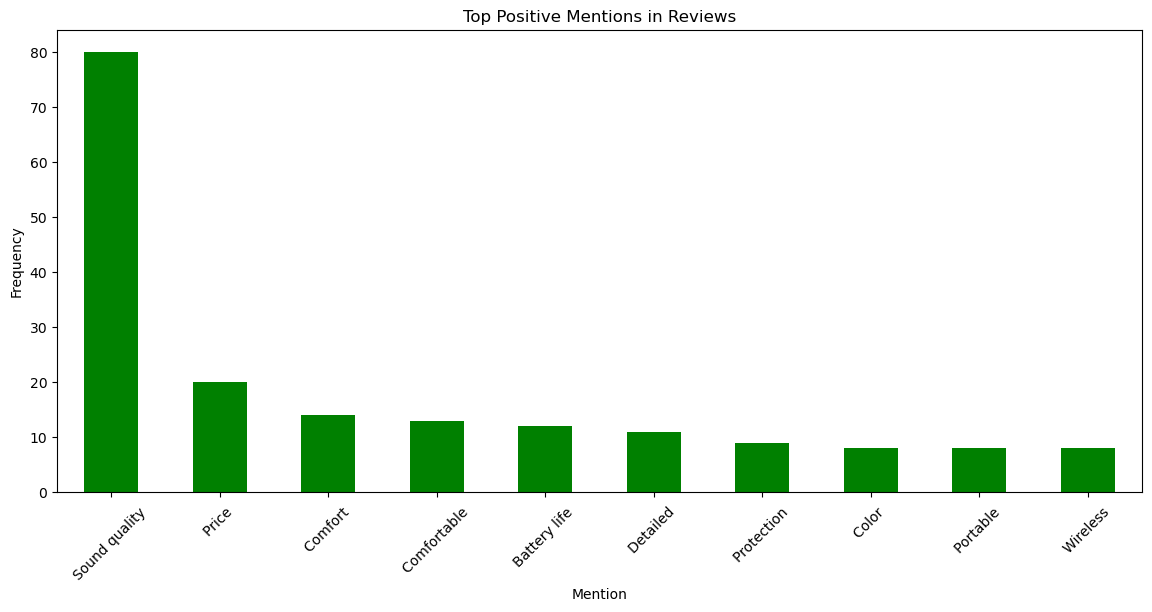

In [79]:
# Plot positive mentions
plt.figure(figsize=(14, 6))
positive_mentions.plot(kind='bar', color='green')
plt.title('Top Positive Mentions in Reviews')
plt.xlabel('Mention')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

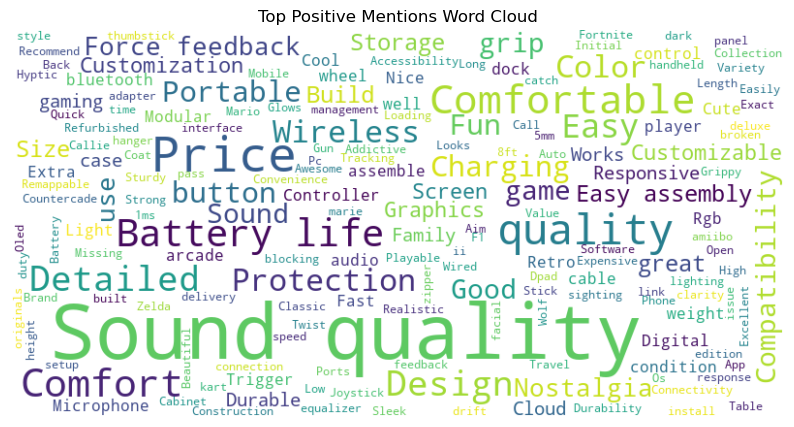

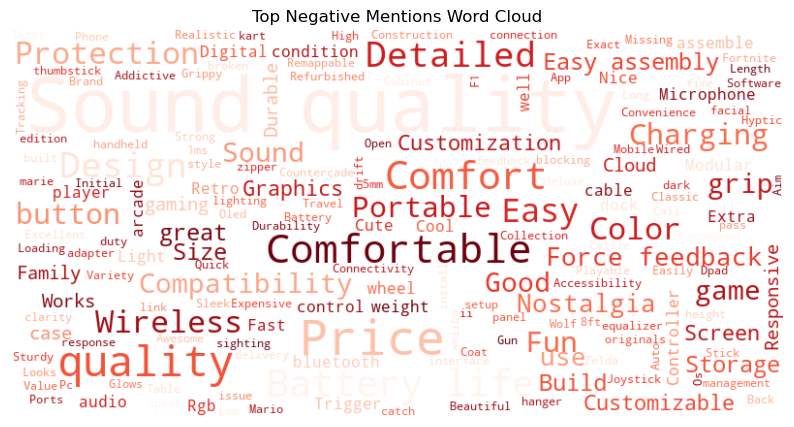

In [80]:
from wordcloud import WordCloud

# Positive mentions word cloud
top_mentions = data['top mentions1'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_mentions)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Positive Mentions Word Cloud')
plt.show()

# Negative mentions word cloud
top_mentions_bad = data['top mention(bad)'].dropna().str.cat(sep=' ')
wordcloud_bad = WordCloud(width=800, height=400, colormap='Reds', background_color='white').generate(top_mentions_bad)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis('off')
plt.title('Top Negative Mentions Word Cloud')
plt.show()


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
# Convert 'recommend rate' column to string type first
data["recommend rate"] = data["recommend rate"].astype(str)
# Then apply the string operations
data["recommend rate"] = data["recommend rate"].str.rstrip('%').astype(float)
data["%off"]

0      0.000000
1      0.475012
2      0.060012
3      0.425011
4      0.000000
         ...   
545    0.000000
546    0.000000
547    0.000000
548    0.250125
549    0.000000
Name: %off, Length: 550, dtype: float64

# Predictive Analysis

## Random Forest Classifier

In [8]:
# Prepare the data for the model
# Select features (X) and target variable (y)
features = ["price","%off","recommend rate","review","review count"]
target = 'Value rating'

data = data.dropna(subset=['Value rating'])
# Split data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Initialize and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_RF = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_RF)
rmse = mse**0.5
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Feature importance
feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))

Mean Squared Error: 0.03773467692307698
Root Mean Squared Error: 0.19425415548470765
          Feature  Importance
2  recommend rate    0.628838
3          review    0.176206
0           price    0.104714
4    review count    0.069774
1            %off    0.020469


## Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression # Import LogisticRegression from the correct module
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

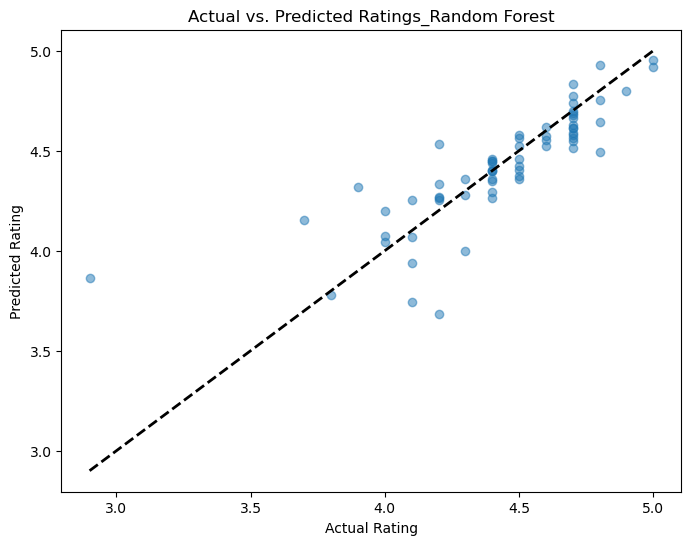

In [11]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_RF, alpha=0.5)  # Alpha for transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings_Random Forest')
plt.show()

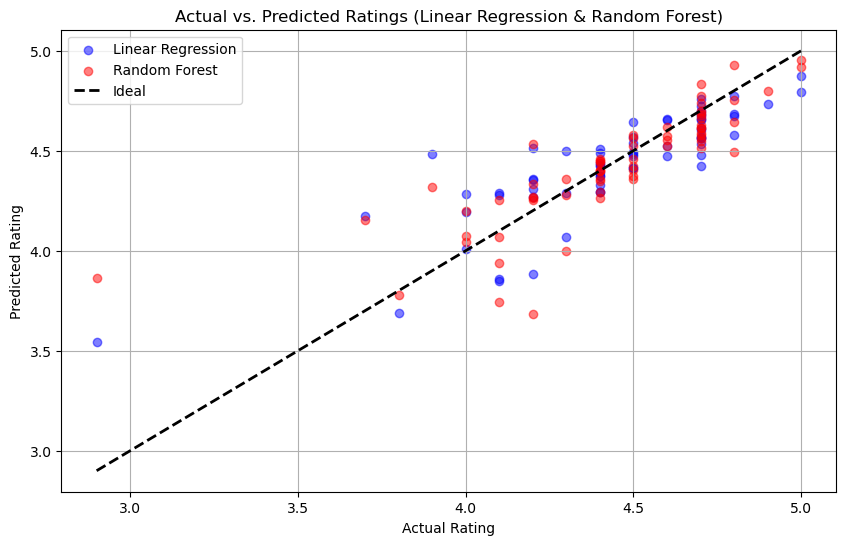

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for Linear Regression predictions
plt.scatter(y_test, y_pred_LR, alpha=0.5, label='Linear Regression', color='blue')

# Scatter plot for Random Forest predictions
plt.scatter(y_test, y_pred_RF, alpha=0.5, label='Random Forest', color='red')

# Diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings (Linear Regression & Random Forest)')
plt.legend()  # Show legend to distinguish models
plt.grid(True)  # Add grid for better visualization
plt.show()

# Conclusion:

The booming video game market, as evidenced by the increasing monthly accessory releases, highlights both the growing demand and the intensifying competition in this industry. Our analysis of Best Buy’s video game segment reveals that strategic product listings and alignment with consumer preferences are pivotal for success in this dynamic landscape. By focusing on key trends such as pricing strategies, demographic targeting, and customer satisfaction metrics, we identified brands that consistently deliver quality and value, reinforcing Best Buy's strategic positioning. Conversely, brands like MSI present opportunities for improvement, allowing Best Buy to refine its offerings further.
Through advanced visualization and predictive modeling, we demonstrated that factors such as price, functionality, and brand reputation significantly influence customer satisfaction. These insights equip Best Buy with actionable recommendations to optimize its product mix, enhance customer engagement, and sustain its competitive edge in the ever-evolving gaming accessories market. This report underscores the importance of aligning supply-side strategies with demand-side expectations to capitalize on the opportunities in this rapidly expanding sector.
